# Predicting Disease Spread - Constellation

Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. 

There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

In [114]:
## Importing all the relavent packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,7]

In [115]:
## Importing independent and target variable

feature_set = pd.read_csv("data/dengue_features_train.csv")
feature_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [116]:
labels = pd.read_csv("data/dengue_labels_train.csv")
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [117]:
## Data cleaning
# Checking null values

print("Null Labels: {}".format(labels['total_cases'].isna().sum()))
print("Null city: {}".format(feature_set['city'].isna().sum()))
print("Null year: {}".format(feature_set['year'].isna().sum()))
print("Null weekofyear: {}".format(feature_set['weekofyear'].isna().sum()))

Null Labels: 0
Null city: 0
Null year: 0
Null weekofyear: 0


In [118]:
print("Shape of feature table: {}\n".format(feature_set.shape))
print("Shape of labels table: {}\n".format(labels.shape))

## To get an understanding about feature datatype and non null values
feature_set.info() #"ndvi_ne" column have most of the missing values

Shape of feature table: (1456, 24)

Shape of labels table: (1456, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis

In [119]:
## Getting null count

feature_set.isnull().sum()                                                             

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [120]:
## Checking the column wise description

for column in feature_set.columns:
    print(feature_set[column].describe(),"\n\n")

count     1456
unique       2
top         sj
freq       936
Name: city, dtype: object 


count    1456.000000
mean     2001.031593
std         5.408314
min      1990.000000
25%      1997.000000
50%      2002.000000
75%      2005.000000
max      2010.000000
Name: year, dtype: float64 


count    1456.000000
mean       26.503434
std        15.019437
min         1.000000
25%        13.750000
50%        26.500000
75%        39.250000
max        53.000000
Name: weekofyear, dtype: float64 


count           1456
unique          1049
top       2000-12-09
freq               2
Name: week_start_date, dtype: object 


count    1262.000000
mean        0.142294
std         0.140531
min        -0.406250
25%         0.044950
50%         0.128817
75%         0.248483
max         0.508357
Name: ndvi_ne, dtype: float64 


count    1404.000000
mean        0.130553
std         0.119999
min        -0.456100
25%         0.049217
50%         0.121429
75%         0.216600
max         0.454429
Name: ndvi_nw, d

In [121]:
## Filling nulls with mean value

for column in feature_set.columns:
    if feature_set[column].isnull().sum()!=0:
        feature_set[column].fillna(np.mean(feature_set[column]),inplace=True)

In [122]:
feature_set.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [123]:
feature_set = feature_set.merge(labels, on=['city', 'year', 'weekofyear'], how='left')

In [124]:
## Convert City column to intiger

enc = OrdinalEncoder()

feature_set.city = enc.fit_transform(feature_set.city.values.reshape(-1,1))

In [125]:
feature_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1.0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1.0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1.0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1.0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1.0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Data exploration

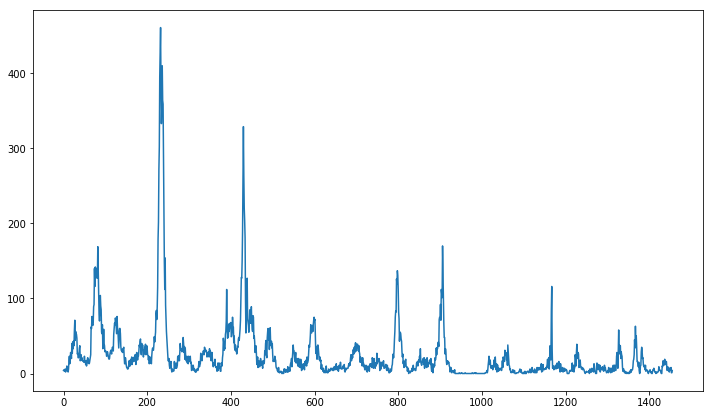

In [126]:
## Checking the distribution of our target variable

plt.plot(labels['total_cases'])

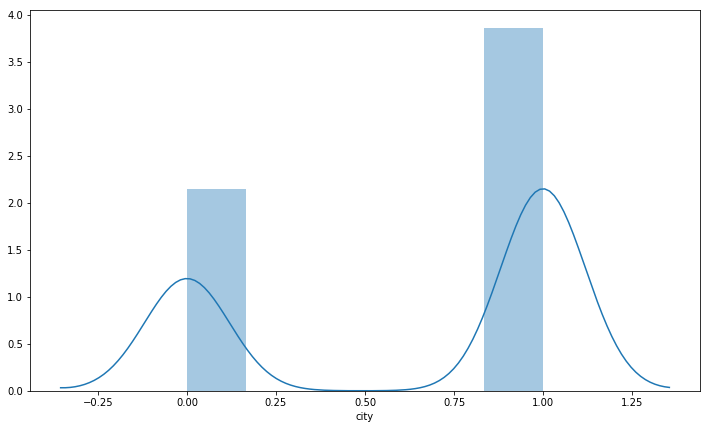

In [127]:
## Distribution of City
sns.distplot(feature_set['city'])

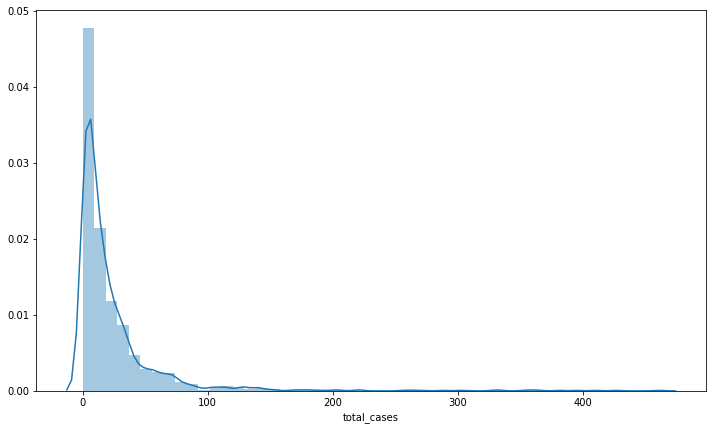

In [128]:
# Target distribution

sns.distplot(labels['total_cases'])

Text(0.5,1,'Variable Correlations')

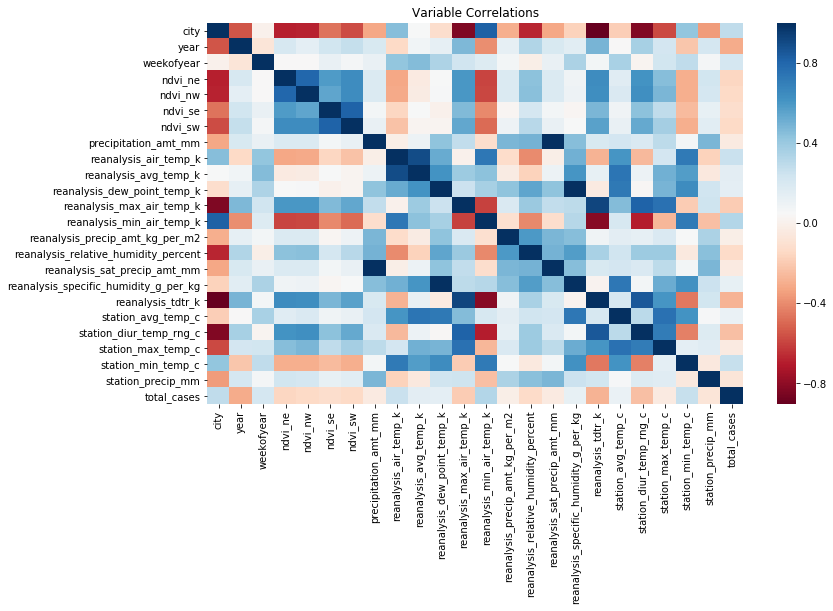

In [129]:
sns.heatmap(feature_set.corr(), cmap='RdBu')
plt.title('Variable Correlations') ## Few variables were highly correlated                      

### Preparing model data

In [178]:
# Split into validation and training data
X = feature_set.drop(['year', 'weekofyear', 'week_start_date', 'total_cases'], axis = 1)
y = feature_set['total_cases']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1, shuffle = True)
print(X_train.shape, X_val.shape, y_train.shape,y_val.shape)

(1310, 21) (146, 21) (1310,) (146,)


### Model buiding & evaluation

In [179]:
## RandomForest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [188]:
 # create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 7, max_features = 'sqrt', random_state = 0)


In [189]:
selector = RFE(rf_regressor, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)

In [190]:
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking) 

Mask data:  [False False  True  True  True False  True  True  True  True  True  True
  True False  True  True False  True  True  True False]
Ranking:  [6 2 1 1 1 5 1 1 1 1 1 1 1 7 1 1 3 1 1 1 4]


In [191]:
features = X_train.columns
print("All features:")
print(features)

print("\nSelected features:")
print(features[filter])

All features:
Index(['city', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Selected features:
Index(['ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c

In [192]:
#X_train = X_train[features[filter]]
#X_val = X_val[features[filter]]

In [193]:
# fit the regressor with x and y data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [194]:
# test the output
Y_pred = rf_regressor.predict(X_val)
Y_pred = Y_pred.round(0)
Y_pred

array([14., 51., 16.,  4., 24., 22., 10.,  4., 37.,  7., 20.,  8.,  5.,
       24., 11., 32.,  7.,  6., 31., 31.,  9., 42., 10.,  7., 24., 12.,
       10., 37.,  6., 10., 31., 35., 34., 32., 38.,  7., 21.,  5., 50.,
        7.,  5., 37., 20., 27., 19., 11.,  5., 38., 35., 12., 29., 16.,
        9., 12., 10., 43.,  6., 11., 19., 11., 21., 27.,  4., 39.,  4.,
       23., 42.,  4., 10., 20., 45., 42., 24., 44., 47., 32., 22., 11.,
       10., 53., 31., 47.,  6., 22., 20., 40., 15., 12., 11., 33., 34.,
       31., 30.,  9.,  5., 11.,  9., 41., 31., 49., 23., 19., 34.,  6.,
        3., 33., 10., 22.,  6.,  6., 85., 23., 31., 52.,  7., 14.,  7.,
       55., 45., 39., 19., 18., 37., 19., 20., 28., 65.,  7., 16., 64.,
       15., 95.,  5., 41.,  5., 11., 21.,  8., 24., 20., 18., 19., 37.,
       52., 24.,  4.])

In [195]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(y_val, Y_pred)
print(error)

18.226027397260275


In [147]:
## Parameter tuning

from sklearn.model_selection import GridSearchCV
from datetime import datetime

## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
}
## show start time
print(datetime.now())

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)

## show end time
print(datetime.now())

2022-08-29 22:18:36.258931
2022-08-29 22:21:33.509316


In [148]:
CV_rfr.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 400}

In [196]:
from xgboost import XGBRegressor

In [197]:
XGB_model = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth = 7, seed = 10)

In [198]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [199]:
xgb_pred = XGB_model.predict(X_val)
xgb_pred = xgb_pred.round()
xgb_pred

array([ 16.,  33.,  12.,   3.,  17.,  28.,   8.,   3.,  18.,  11.,   9.,
         3.,   3.,  44.,  11.,   1.,   8.,   6.,  26.,  30.,   9.,  46.,
         8.,   5.,  10.,  10.,  16.,  33.,   4.,  15.,   9.,  23.,  18.,
        44.,  32.,   4.,  11.,   3.,  33.,   8.,   6.,  25.,  23.,  39.,
        18.,  12.,   2.,  27.,  27.,   8.,  17.,  17.,  14.,  11.,  10.,
        47.,   5.,   9.,  15.,  11.,  18.,  39.,   3.,  47.,   6.,  20.,
        40.,   5.,   8.,  36.,  32.,  32.,   7.,  66.,  48.,  29.,  17.,
         7.,   9.,  34.,  39.,  39.,   4.,  20.,  23.,  17.,  10.,  11.,
        15.,  55.,  21.,  18.,  28.,   9.,   8.,  18.,  11.,  32.,  29.,
        45.,  30.,  20.,  24.,   1.,   2.,  20.,   8.,   6.,   5.,   8.,
       272.,  21.,  44.,  56.,   5.,  13.,  14.,  82.,  51.,  59.,  23.,
        18.,  25.,  18.,  12.,  26.,  86.,   5.,   4.,  46.,  10.,  94.,
        -1.,  48.,   3.,  12.,   9.,   9.,  16.,  68.,  16.,  13.,  35.,
        63.,  32.,   3.], dtype=float32)

In [200]:
mae(y_val, xgb_pred)

16.061643835616437

### Prediction on Test dataset 

In [85]:
test_set_main = pd.read_csv("data/dengue_features_test.csv")
test_set_main.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [86]:
## Converting city to ordinal numebrs

test_set = test_set_main.copy()
test_set.city = enc.fit_transform(test_set.city.values.reshape(-1,1))
test_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,1.0,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,1.0,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,1.0,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,1.0,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [87]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null float64
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2 

In [88]:
## Filling nulls with mean value

for column in test_set.columns:
    if test_set[column].isnull().sum()!=0:
        test_set[column].fillna(np.mean(test_set[column]),inplace=True)

In [89]:
test_set = test_set.drop(['year', 'weekofyear', 'week_start_date'], axis = 1)
test_set.shape

(416, 21)

In [90]:
## Predicting test set values

test_prediction = rf_regressor.predict(test_set)
test_prediction = test_prediction.round()
len(test_prediction)

416

In [92]:
test_set_main['total_cases'] = test_prediction
submission_file = test_set_main[['city', 'year', 'weekofyear', 'total_cases']]
submission_file.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,18.0
1,sj,2008,19,22.0
2,sj,2008,20,31.0
3,sj,2008,21,46.0
4,sj,2008,22,29.0


In [93]:
submission_file.to_csv('final_file.csv')